Seleciona 10 a 15 vars,
Modelagem
Relações entre elas, relações quadraticas entre elas

Regressao binária

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carrega o dataset
df = pd.read_csv("bankrupcy.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [102]:
# verificando se há valores nulos
df.isnull().sum().sum()

# verificando o tipo de dados
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [103]:
df.shape

(6819, 96)

In [104]:
df.columns.tolist()

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' C

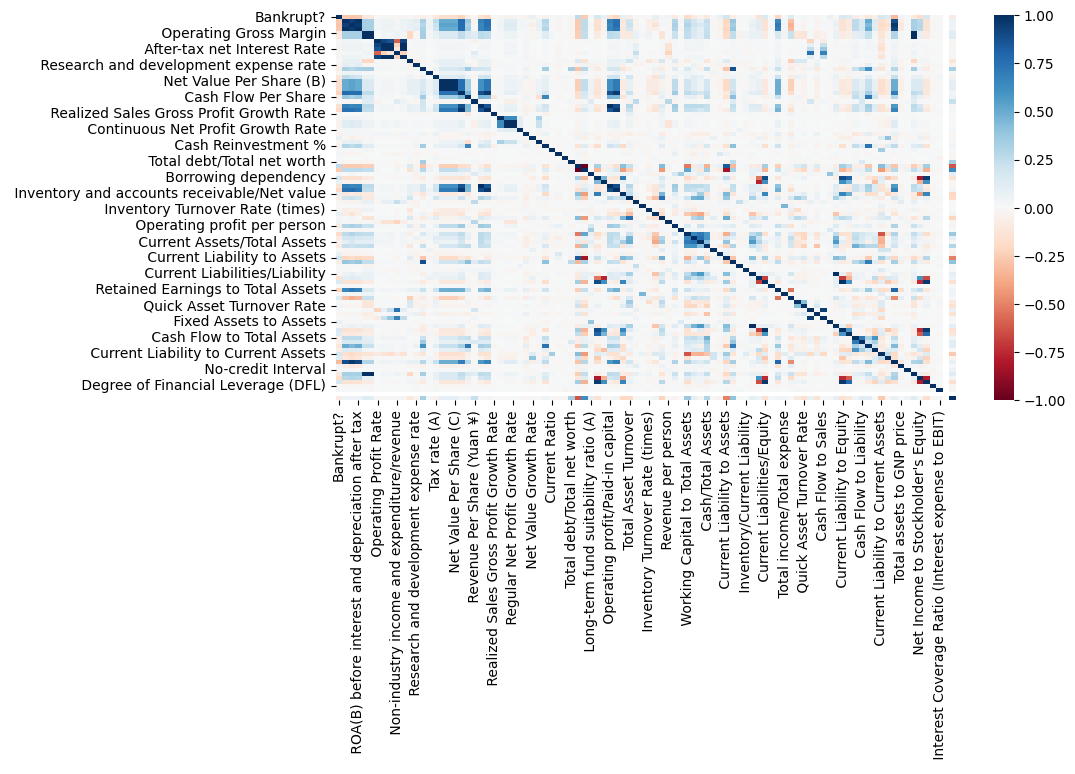

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
                                                              ...   
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(A) before interest and % after tax                    -0.282941
 Net Income to Total Assets                                -0.315457
 Net Income Flag                                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64

In [105]:
# nossa target é a coluna 'Bankrupt?'
# vamos descobrir quais colunas se relacionam com essa target e quais são independentes:

# correlação entre as variáveis
df.corr()

# plotando o heatmap, para a cor ser melhor visualizada no intervalo central, vamos usar o cmap='RdBu'
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=False, cmap='RdBu')
plt.show()

# vamos ver a correlação entre as variáveis e a target
df.corr()['Bankrupt?'].sort_values(ascending=False)




<Figure size 500x500 with 0 Axes>

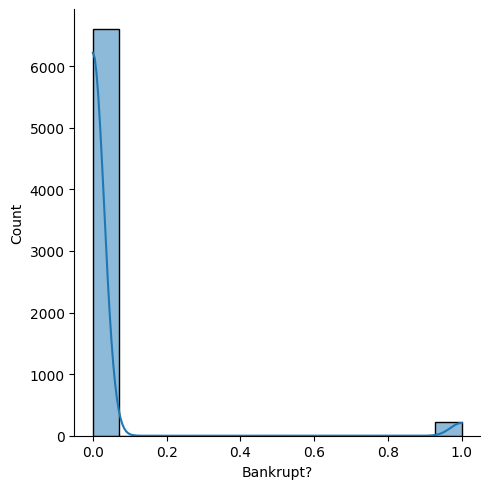

In [106]:
# verificando a distribuição de y
plt.figure(figsize=(5,5))
sns.displot(df['Bankrupt?'], kde=True, label='y')
plt.plot()

# como temos muito mais valores 0 do que 1, vamos fazer um undersampling

# contagem de 0 e 1
df['Bankrupt?'].value_counts()

# podemos perceber que temos apenas 220 valores 1, vamos pegar 150 valores 0 e 1 aleatórios
df_0 = df[df['Bankrupt?'] == 0].sample(150)
df_1 = df[df['Bankrupt?'] == 1].sample(150)

df_complete = df

# concatenando os dois df
df = pd.concat([df_0, df_1])


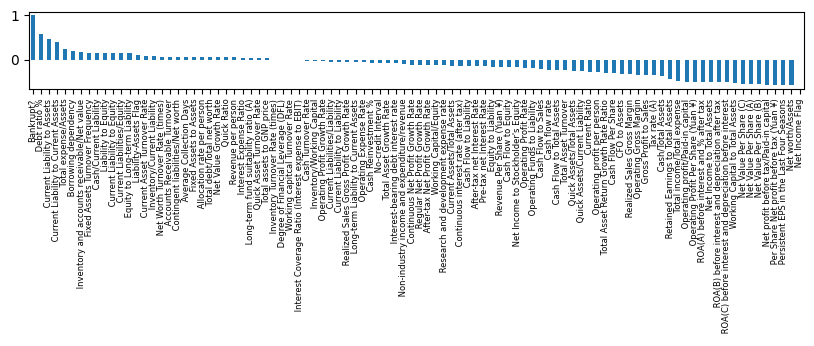

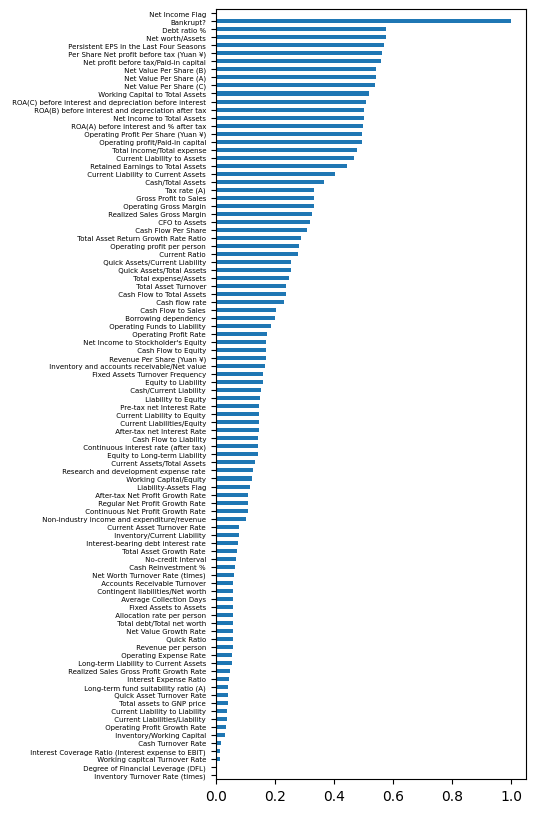

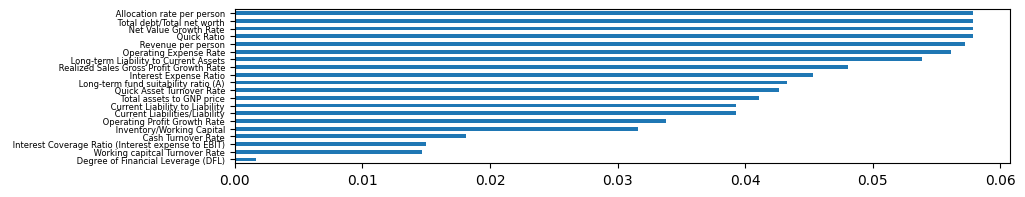

In [107]:
# ordenando as colunas por quantidade de informação de cada uma
df.corr()['Bankrupt?'].sort_values(ascending=False).plot(kind='bar', figsize=(10,1))
plt.xticks(fontsize=6)
plt.show()

# refazendo o gráfico, agora com o valor absoluto e na horizontal
df.corr()['Bankrupt?'].abs().sort_values(ascending=True).plot(kind='barh', figsize=(4,10))
plt.yticks(fontsize=5)
plt.show()

# como correlação negativa também é correlação, vamos utilizar o valor absoluto, considerando apenas as 15 primeiras, excluindo a própria target
df.corr()['Bankrupt?'].abs().sort_values(ascending=True)[1:21].plot(kind='barh', figsize=(10,2))
# diminuindo o tamanho da fonte
plt.yticks(fontsize=6)
plt.show()


In [108]:
# considerando apenas o df com essas colunas e a target a partir de agora
columns = df.corr()['Bankrupt?'].abs().sort_values(ascending=False)[1:21].index.tolist()
# adicionando a target
columns.append('Bankrupt?')


# usaremos as seguintes colunas:
columns = [
 ' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(C) before interest and depreciation before interest',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Retained Earnings to Total Assets',
 ' Net profit before tax/Paid-in capital',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Current Liability to Assets',
 ' Working Capital to Total Assets',
  'Bankrupt?']

column_dict = {
    ' Net Income to Total Assets': 'α₀',
    ' ROA(A) before interest and % after tax': 'α₁',
    ' ROA(B) before interest and depreciation after tax': 'α₂',
    ' ROA(C) before interest and depreciation before interest': 'α₃',
    ' Debt ratio %': 'α₄',
    ' Net worth/Assets': 'α₅',
    ' Retained Earnings to Total Assets': 'α₆',
    ' Net profit before tax/Paid-in capital': 'α₇',
    ' Per Share Net profit before tax (Yuan ¥)': 'α₈',
    ' Current Liability to Assets': 'α₉',
    ' Working Capital to Total Assets': 'α₁₀',
    'Bankrupt?': 'y'
}


# criando um novo df
df = df[columns]
df_complete = df_complete[columns]

# valores unicos da coluna
df['Bankrupt?'].value_counts()



Bankrupt?
0    150
1    150
Name: count, dtype: int64

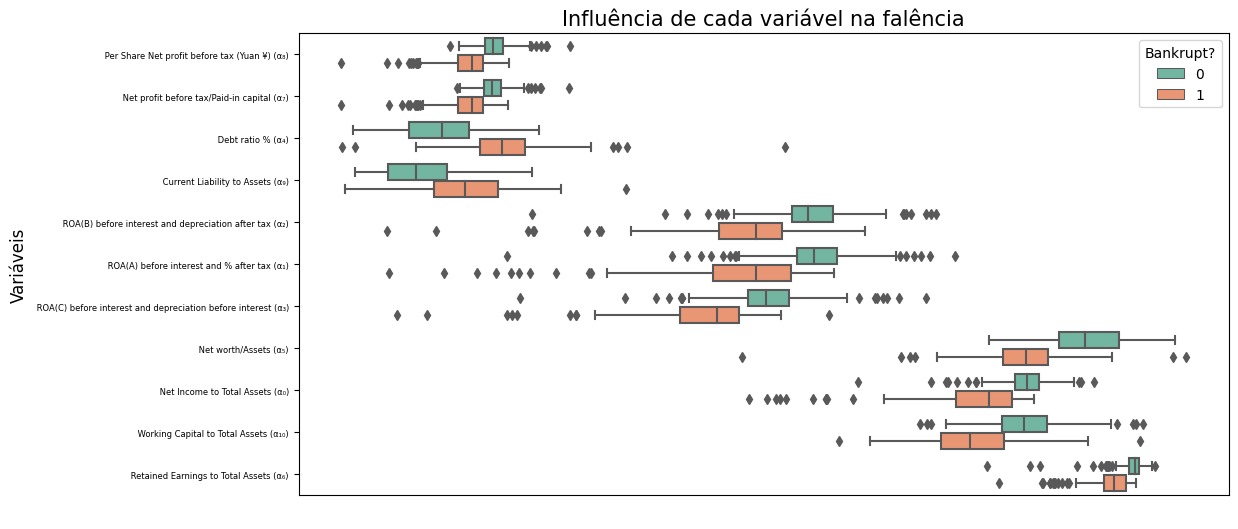

In [109]:
# vendo o quanto cada c0luna influencia na target
# modificamos um dataframe extra para termos a coluna 'x', com os nomes das colunas, a coluna 'y', com os valores do indicador 'x', e 'bankrupt' indicando se faliu ou não
# para isso, faremos um melt no df, transformando as colunas em linhas
df_melt = pd.melt(df, id_vars=['Bankrupt?'], var_name='x', value_name='y')
# ordenando os valores pela coluna 'y'
df_melt = df_melt.sort_values(by='y')

# adicioando ao fim da coluna x, o texto: " (αᵢ) ", onde i é o número da coluna
df_melt['x'] = df_melt['x'] + " (" + df_melt['x'].map(column_dict) + ")"


plt.figure(figsize=(12,6))
sns.boxplot(x='y', y='x', hue='Bankrupt?', data=df_melt, orient='h', palette='Set2')
plt.yticks(fontsize=6)
plt.title('Influência de cada variável na falência', fontsize=15)
plt.ylabel('Variáveis', fontsize=12)
plt.xlabel(' ', fontsize=12)
# removendo y ticks
plt.xticks([])
plt.show()


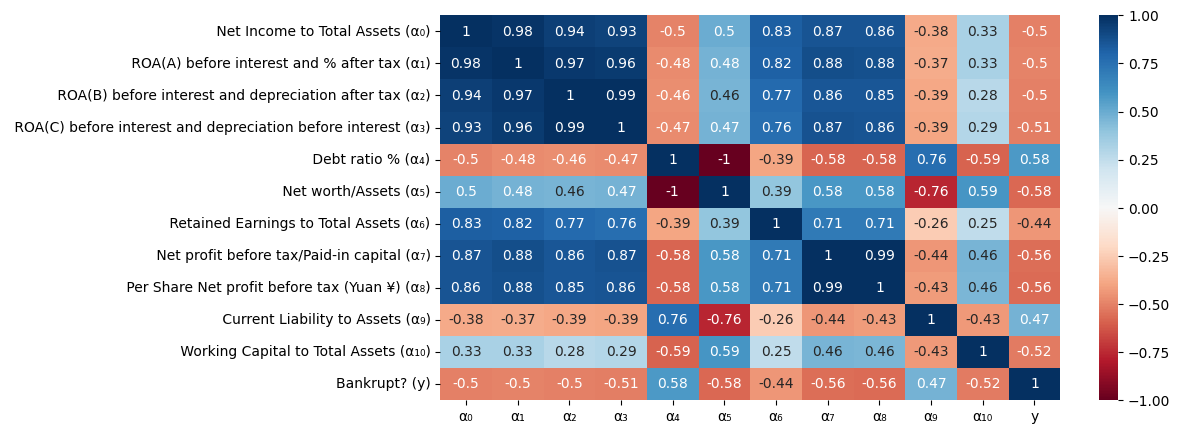

In [110]:
# verificando as correlações entre as colunas em um heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')

# mudando os ticks y para usar nome da coluna seguido do α₀, α₁, etc
plt.yticks(np.arange(0.5, 12.5, 1), df.columns + " (" + df.columns.map(column_dict) + ")", fontsize=10)
# mudando os ticks x para apenas a notação com α₀, α₁, etc
plt.xticks(np.arange(0.5, 12.5, 1), df.columns.map(column_dict), fontsize=10, rotation=0)
plt.show()

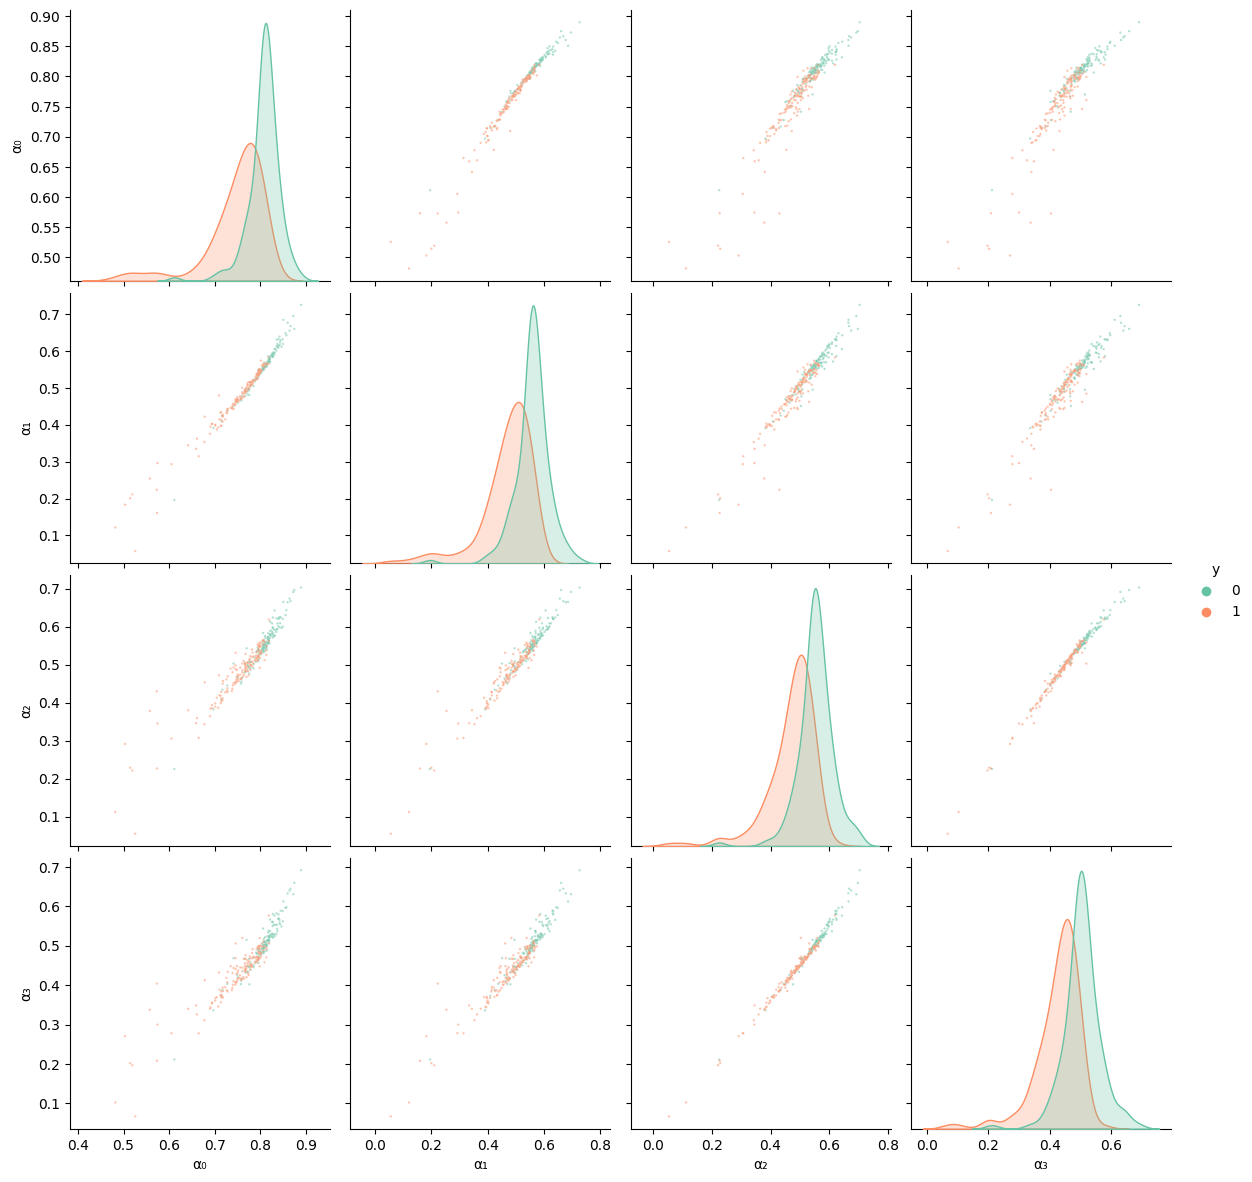

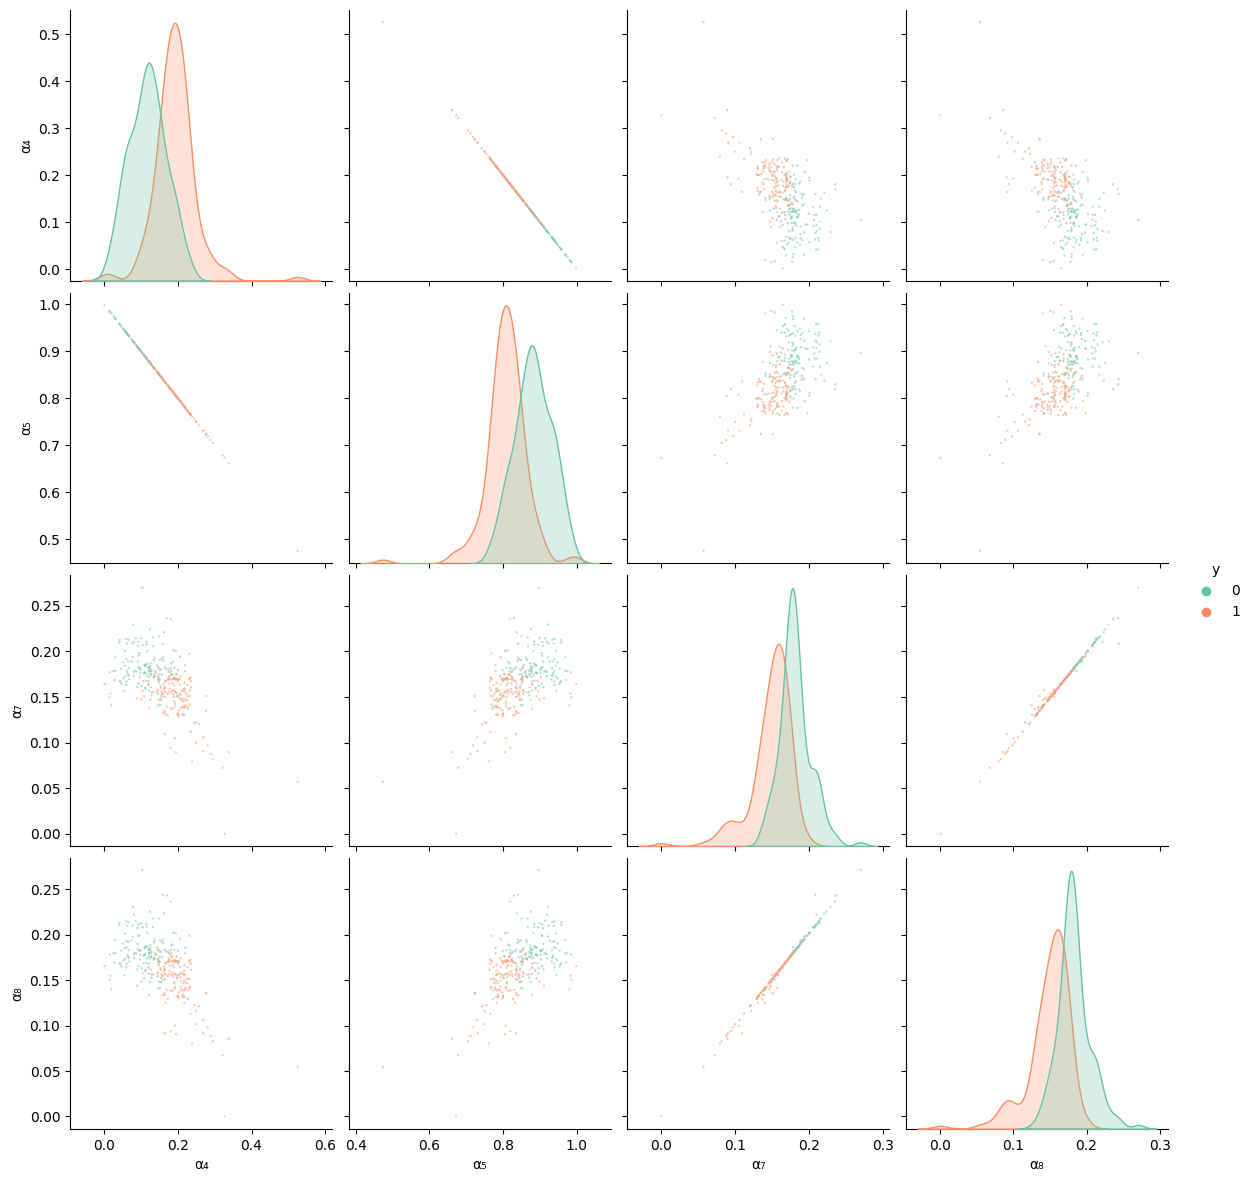

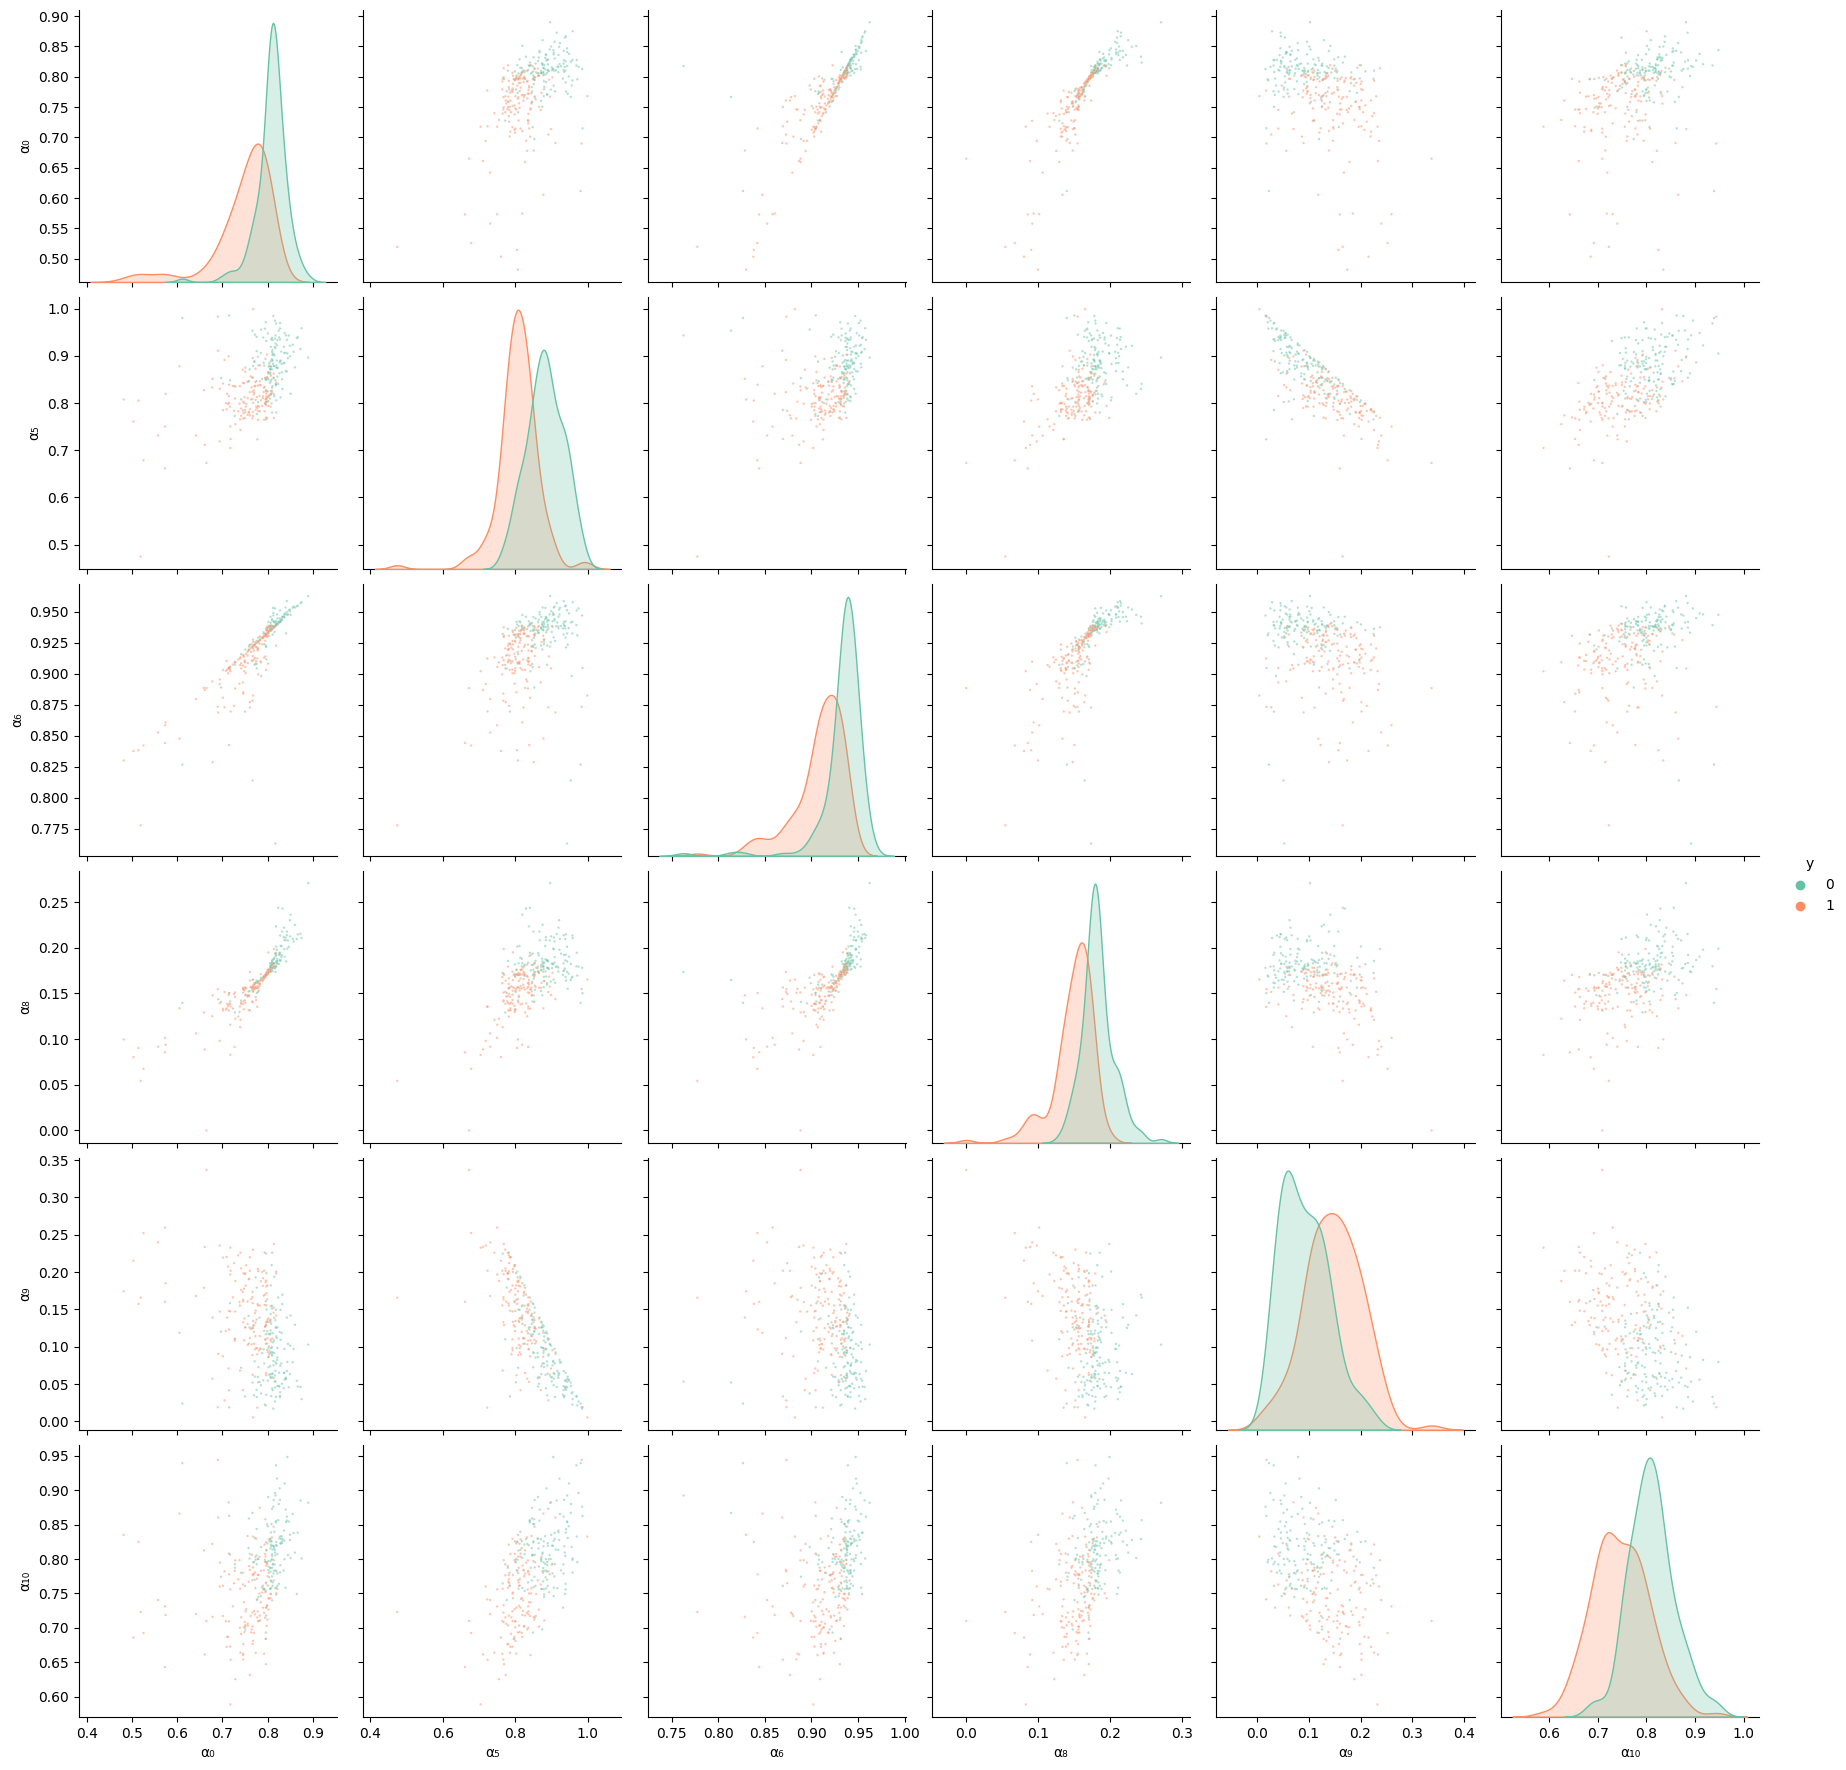

In [111]:
# renomeando as colunas
df = df.rename(columns=column_dict)
df_complete = df_complete.rename(columns=column_dict)

# plotando um scatterplot entre as colunas α₀, α₁, α₂ e α₃
sns.pairplot(df, hue='y', vars=['α₀', 'α₁', 'α₂', 'α₃'], palette='Set2', height=3, aspect=1, plot_kws={'alpha': 0.5, 's': 3})
plt.show()

# agora entre α₄, α₅, α₇ e α₈
sns.pairplot(df, hue='y', vars=['α₄', 'α₅', 'α₇', 'α₈'], palette='Set2', height=3, aspect=1, plot_kws={'alpha': 0.5, 's': 3})
plt.show()

# removendo as colunas dependentes
df = df.drop(['α₁', 'α₂', 'α₃', 'α₄', 'α₇'], axis=1)
df_complete = df_complete.drop(['α₁', 'α₂', 'α₃', 'α₄', 'α₇'], axis=1)
# mostrando o pairplot com todas
sns.pairplot(df, hue='y', palette='Set2', height=3, aspect=1, plot_kws={'alpha': 0.5, 's': 3})
plt.show()

<Axes: >

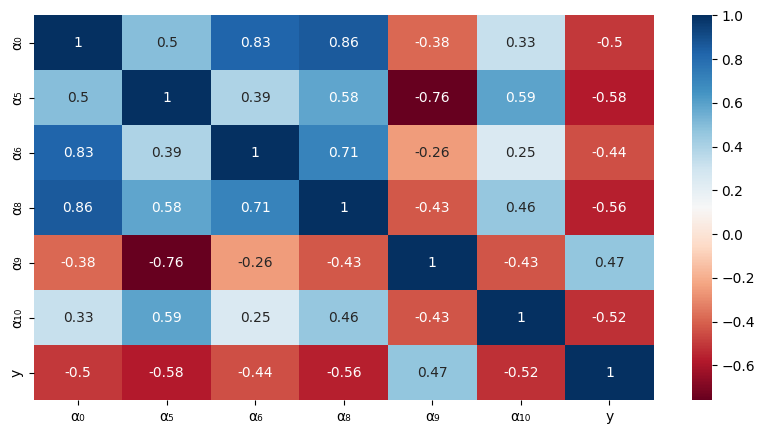

In [112]:
# fazendo o heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')

In [113]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# import stan
import statsmodels.api as sm
import statsmodels.formula.api as smf

column_dict_2 = {
    'α₀': 'x_0',
    'α₅': 'x_1',
    'α₆': 'x_2',
    'α₈': 'x_3',
    'α₉': 'x_4',
    'α₁₀': 'x_5',
    'y': 'y'
}

df = df.rename(columns=column_dict_2)
df_complete = df_complete.rename(columns=column_dict_2)

X = df.drop('y', axis=1)
y = df['y']

# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# normalizando os dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

X = df.drop('y', axis=1)
y = df['y']

# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [114]:
# fazendo um modelo de regressão logística sklearn
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# fazendo as previsões
y_pred = log_reg.predict(X_test)

# verificando a acurácia
print("Acurácia: ", accuracy_score(y_test, y_pred))

Acurácia:  0.8222222222222222


In [115]:
# sendo assim, vamos fazer um modelo sem levar em consideração as interações
formula_0 = 'y ~ x_0 + x_1 + x_2 + x_3 + x_4 + x_5'
model_0 = smf.glm(formula=formula_0, data=df_train, family=sm.families.Binomial()).fit()

# usa o modelo para fazer previsões
y_proba_0 = model_0.predict(df_test)

# transforma as previsões em 0 ou 1
y_pred_0 = y_proba_0.apply(lambda x: 1 if x > 0.5 else 0)

# verificando a acurácia
accuracy_score(df_test['y'], y_pred_0)

0.8777777777777778

In [116]:
import statsmodels.formula.api as smf

# fazendo um modelo com interações
formula_1 = 'y ~ x_0 + x_1 + x_2 + x_5 + x_0*x_3 + x_1*x_4'
model_1 = smf.glm(formula=formula_1, data=df_train, family=sm.families.Binomial()).fit()

y_proba_1 = model_1.predict(df_test)
y_pred_1 = y_proba_1.apply(lambda x: 1 if x > 0.5 else 0)

accuracy_score(df_test['y'], y_pred_1)

0.8777777777777778

In [117]:
import statsmodels.formula.api as smf

# fazendo um modelo com parte das preditoras
formula_2 = 'y ~ x_1'
model_2 = smf.glm(formula=formula_2, data=df_train, family=sm.families.Binomial()).fit()

y_proba_2 = model_2.predict(df_test)
y_pred_2 = y_proba_2.apply(lambda x: 1 if x > 0.5 else 0)

accuracy_score(df_test['y'], y_pred_2)

0.8111111111111111

In [118]:
import statsmodels.formula.api as smf

# fazendo um modelo com parte das preditoras
formula_3 = 'y ~ x_2'
model_3 = smf.glm(formula=formula_3, data=df_train, family=sm.families.Binomial()).fit()

y_proba_3 = model_3.predict(df_test)
y_pred_3 = y_proba_3.apply(lambda x: 1 if x > 0.5 else 0)

accuracy_score(df_test['y'], y_pred_3)

0.7777777777777778

In [119]:
import statsmodels.formula.api as smf

# fazendo um modelo com parte das preditoras
formula_4 = 'y ~ x_3'
model_4 = smf.glm(formula=formula_4, data=df_train, family=sm.families.Binomial()).fit()

y_proba_4 = model_4.predict(df_test)
y_pred_4 = y_proba_4.apply(lambda x: 1 if x > 0.5 else 0)

accuracy_score(df_test['y'], y_pred_4)

0.7888888888888889

In [120]:
import statsmodels.formula.api as smf

# fazendo um modelo com parte das preditoras
formula_5 = 'y ~ x_4'
model_5 = smf.glm(formula=formula_5, data=df_train, family=sm.families.Binomial()).fit()

y_proba_5 = model_5.predict(df_test)
y_pred_5 = y_proba_5.apply(lambda x: 1 if x > 0.5 else 0)

accuracy_score(df_test['y'], y_pred_5)

0.7

In [121]:
import statsmodels.formula.api as smf

# fazendo um modelo com parte das preditoras
formula_6 = 'y ~ x_5'
model_6 = smf.glm(formula=formula_6, data=df_train, family=sm.families.Binomial()).fit()

y_proba_6 = model_6.predict(df_test)
y_pred_6 = y_proba_6.apply(lambda x: 1 if x > 0.5 else 0)

accuracy_score(df_test['y'], y_pred_6)

0.7333333333333333

In [122]:
import statsmodels.formula.api as smf

# fazendo um modelo com parte das preditoras
formula_7 = 'y ~ x_0'
model_7 = smf.glm(formula=formula_7, data=df_train, family=sm.families.Binomial()).fit()

y_proba_7 = model_7.predict(df_test)
y_pred_7 = y_proba_7.apply(lambda x: 1 if x > 0.5 else 0)

accuracy_score(df_test['y'], y_pred_7)

0.7555555555555555

In [123]:
import statsmodels.formula.api as smf

# fazendo um modelo com parte das preditoras
formula_8 = 'y ~ x_0 + x_1'
model_8 = smf.glm(formula=formula_8, data=df_train, family=sm.families.Binomial()).fit()

y_proba_8 = model_8.predict(df_test)
y_pred_8 = y_proba_8.apply(lambda x: 1 if x > 0.5 else 0)

accuracy_score(df_test['y'], y_pred_8)

0.8555555555555555

In [124]:
# verificando a generalização de cada modelo
X_test = df_complete.drop('y', axis=1)
y_test = df_complete['y']

# fazendo as previsões
y_proba_0 = model_0.predict(X_test)
y_proba_1 = model_1.predict(X_test)
y_proba_2 = model_2.predict(X_test)
y_proba_3 = model_3.predict(X_test)
y_proba_4 = model_4.predict(X_test)
y_proba_5 = model_5.predict(X_test)
y_proba_6 = model_6.predict(X_test)
y_proba_7 = model_7.predict(X_test)
y_proba_8 = model_8.predict(X_test)

# transforma as previsões em 0 ou 1
y_pred_0 = y_proba_0.apply(lambda x: 1 if x > 0.5 else 0)
y_pred_1 = y_proba_1.apply(lambda x: 1 if x > 0.5 else 0)
y_pred_2 = y_proba_2.apply(lambda x: 1 if x > 0.5 else 0)
y_pred_3 = y_proba_3.apply(lambda x: 1 if x > 0.5 else 0)
y_pred_4 = y_proba_4.apply(lambda x: 1 if x > 0.5 else 0)
y_pred_5 = y_proba_5.apply(lambda x: 1 if x > 0.5 else 0)
y_pred_6 = y_proba_6.apply(lambda x: 1 if x > 0.5 else 0)
y_pred_7 = y_proba_7.apply(lambda x: 1 if x > 0.5 else 0)
y_pred_8 = y_proba_8.apply(lambda x: 1 if x > 0.5 else 0)

# printando a legenda dos modelos
print("Modelo 0: Todas as variáveis")
print("Modelo 1: Todas as variáveis + interações")
print("Modelo 2: x_1")
print("Modelo 3: x_2")
print("Modelo 4: x_3")
print("Modelo 5: x_4")
print("Modelo 6: x_5")
print("Modelo 7: x_0")
print("Modelo 8: x_0 + x_1")

print("")

# verificando a acurácia
print("Acurácia Modelo 0: ", accuracy_score(y_test, y_pred_0))
print("Acurácia Modelo 1: ", accuracy_score(y_test, y_pred_1))
print("Acurácia Modelo 2: ", accuracy_score(y_test, y_pred_2))
print("Acurácia Modelo 3: ", accuracy_score(y_test, y_pred_3))
print("Acurácia Modelo 4: ", accuracy_score(y_test, y_pred_4))
print("Acurácia Modelo 5: ", accuracy_score(y_test, y_pred_5))
print("Acurácia Modelo 6: ", accuracy_score(y_test, y_pred_6))
print("Acurácia Modelo 7: ", accuracy_score(y_test, y_pred_7))
print("Acurácia Modelo 8: ", accuracy_score(y_test, y_pred_8))


Modelo 0: Todas as variáveis
Modelo 1: Todas as variáveis + interações
Modelo 2: x_1
Modelo 3: x_2
Modelo 4: x_3
Modelo 5: x_4
Modelo 6: x_5
Modelo 7: x_0
Modelo 8: x_0 + x_1

Acurácia Modelo 0:  0.8760815368822408
Acurácia Modelo 1:  0.8769614312949113
Acurácia Modelo 2:  0.8210881360903358
Acurácia Modelo 3:  0.8772547294324681
Acurácia Modelo 4:  0.8420589529256489
Acurácia Modelo 5:  0.7798797477636017
Acurácia Modelo 6:  0.7190203842205602
Acurácia Modelo 7:  0.8615632790731779
Acurácia Modelo 8:  0.8774013785012466


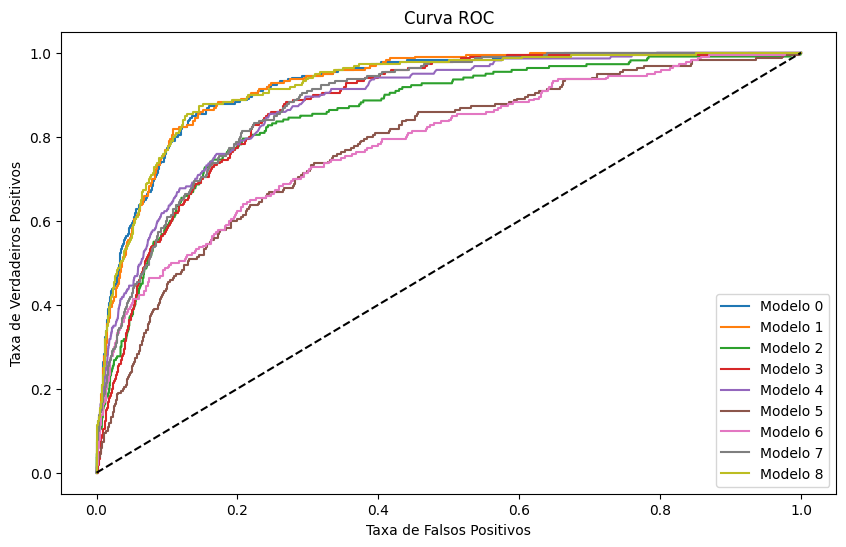

AUC Modelo 0:  0.9219275647825429
AUC Modelo 1:  0.9235565994847704
AUC Modelo 2:  0.8549060463706623
AUC Modelo 3:  0.8749948339280056
AUC Modelo 4:  0.8797458981388364
AUC Modelo 5:  0.7751015994158894
AUC Modelo 6:  0.7828872143162187
AUC Modelo 7:  0.8828086900219042
AUC Modelo 8:  0.9210266018267231


In [125]:
# plotando curva roc para os modelos 0 e 1
from sklearn.metrics import roc_curve, roc_auc_score

# usando os dados completos para o teste
X_test = df_complete.drop('y', axis=1)
y_test = df_complete['y']

# calculando a curva roc para os modelos
fpr_0, tpr_0, thresholds_0 = roc_curve(y_test, model_0.predict(X_test))
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, model_1.predict(X_test))
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, model_2.predict(X_test))
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, model_3.predict(X_test))
fpr_4, tpr_4, thresholds_4 = roc_curve(y_test, model_4.predict(X_test))
fpr_5, tpr_5, thresholds_5 = roc_curve(y_test, model_5.predict(X_test))
fpr_6, tpr_6, thresholds_6 = roc_curve(y_test, model_6.predict(X_test))
fpr_7, tpr_7, thresholds_7 = roc_curve(y_test, model_7.predict(X_test))
fpr_8, tpr_8, thresholds_8 = roc_curve(y_test, model_8.predict(X_test))


# plotando as curvas roc
plt.figure(figsize=(10, 6))
plt.plot(fpr_0, tpr_0, label='Modelo 0')
plt.plot(fpr_1, tpr_1, label='Modelo 1')
plt.plot(fpr_2, tpr_2, label='Modelo 2')
plt.plot(fpr_3, tpr_3, label='Modelo 3')
plt.plot(fpr_4, tpr_4, label='Modelo 4')
plt.plot(fpr_5, tpr_5, label='Modelo 5')
plt.plot(fpr_6, tpr_6, label='Modelo 6')
plt.plot(fpr_7, tpr_7, label='Modelo 7')
plt.plot(fpr_8, tpr_8, label='Modelo 8')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# calculando a área sob a curva roc
print("AUC Modelo 0: ", roc_auc_score(y_test, model_0.predict(X_test)))
print("AUC Modelo 1: ", roc_auc_score(y_test, model_1.predict(X_test)))
print("AUC Modelo 2: ", roc_auc_score(y_test, model_2.predict(X_test)))
print("AUC Modelo 3: ", roc_auc_score(y_test, model_3.predict(X_test)))
print("AUC Modelo 4: ", roc_auc_score(y_test, model_4.predict(X_test)))
print("AUC Modelo 5: ", roc_auc_score(y_test, model_5.predict(X_test)))
print("AUC Modelo 6: ", roc_auc_score(y_test, model_6.predict(X_test)))
print("AUC Modelo 7: ", roc_auc_score(y_test, model_7.predict(X_test)))
print("AUC Modelo 8: ", roc_auc_score(y_test, model_8.predict(X_test)))

In [126]:
# avaliando o modelo com AIC
print("AIC Modelo 0: ", model_0.aic)
print("AIC Modelo 1: ", model_1.aic)
print("AIC Modelo 2: ", model_2.aic)
print("AIC Modelo 3: ", model_3.aic)
print("AIC Modelo 4: ", model_4.aic)
print("AIC Modelo 5: ", model_5.aic)
print("AIC Modelo 6: ", model_6.aic)
print("AIC Modelo 7: ", model_7.aic)
print("AIC Modelo 8: ", model_8.aic)

AIC Modelo 0:  162.30051192130009
AIC Modelo 1:  163.21170170762863
AIC Modelo 2:  200.49134531749667
AIC Modelo 3:  255.56215135365247
AIC Modelo 4:  206.9027213564711
AIC Modelo 5:  243.07695815670132
AIC Modelo 6:  224.8438669319424
AIC Modelo 7:  222.73864553096686
AIC Modelo 8:  168.92204888139173


In [141]:
# observando a acurácia de cada modelo no teste balanceado
# balanceando o df
df_0 = df_complete[df_complete['y'] == 0].sample(220)
df_1 = df_complete[df_complete['y'] == 1].sample(220)
df_balanced = pd.concat([df_0, df_1])

X_test = df_balanced.drop('y', axis=1)
y_test = df_balanced['y']

y_pred_0 = model_0.predict(X_test)
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)
y_pred_4 = model_4.predict(X_test)
y_pred_5 = model_5.predict(X_test)
y_pred_6 = model_6.predict(X_test)
y_pred_7 = model_7.predict(X_test)
y_pred_8 = model_8.predict(X_test)

y_pred_0 = np.where(y_pred_0 > 0.5, 1, 0)
y_pred_1 = np.where(y_pred_1 > 0.5, 1, 0)
y_pred_2 = np.where(y_pred_2 > 0.5, 1, 0)
y_pred_3 = np.where(y_pred_3 > 0.5, 1, 0)
y_pred_4 = np.where(y_pred_4 > 0.5, 1, 0)
y_pred_5 = np.where(y_pred_5 > 0.5, 1, 0)
y_pred_6 = np.where(y_pred_6 > 0.5, 1, 0)
y_pred_7 = np.where(y_pred_7 > 0.5, 1, 0)
y_pred_8 = np.where(y_pred_8 > 0.5, 1, 0)

print("Acurácia Modelo 0: ", accuracy_score(y_test, y_pred_0))
print("Acurácia Modelo 1: ", accuracy_score(y_test, y_pred_1))
print("Acurácia Modelo 2: ", accuracy_score(y_test, y_pred_2))
print("Acurácia Modelo 3: ", accuracy_score(y_test, y_pred_3))
print("Acurácia Modelo 4: ", accuracy_score(y_test, y_pred_4))
print("Acurácia Modelo 5: ", accuracy_score(y_test, y_pred_5))
print("Acurácia Modelo 6: ", accuracy_score(y_test, y_pred_6))
print("Acurácia Modelo 7: ", accuracy_score(y_test, y_pred_7))
print("Acurácia Modelo 8: ", accuracy_score(y_test, y_pred_8))


Acurácia Modelo 0:  0.8431818181818181
Acurácia Modelo 1:  0.8431818181818181
Acurácia Modelo 2:  0.7704545454545455
Acurácia Modelo 3:  0.759090909090909
Acurácia Modelo 4:  0.7909090909090909
Acurácia Modelo 5:  0.6863636363636364
Acurácia Modelo 6:  0.7090909090909091
Acurácia Modelo 7:  0.7704545454545455
Acurácia Modelo 8:  0.8409090909090909


,y_hat,lower,upper,y,pred_y,correct,order,index
0,0.037546,0.012684,0.105914,1,0,0,9.962454,0
1,0.061410,0.020440,0.170226,1,0,0,9.938590,1
2,0.089749,0.033832,0.217300,1,0,0,9.910251,2
3,0.103480,0.032838,0.281810,1,0,0,9.896520,3
4,0.107319,0.010150,0.584973,1,0,0,9.892681,4
...,...,...,...,...,...,...,...,...
435,0.870367,0.733118,0.942564,0,1,0,-0.870367,435
436,0.894612,0.649110,0.974971,0,1,0,-0.894612,436
437,0.918301,0.761286,0.975379,0,1,0,-0.918301,437
438,0.927098,0.820700,0.972476,0,1,0,-0.927098,438


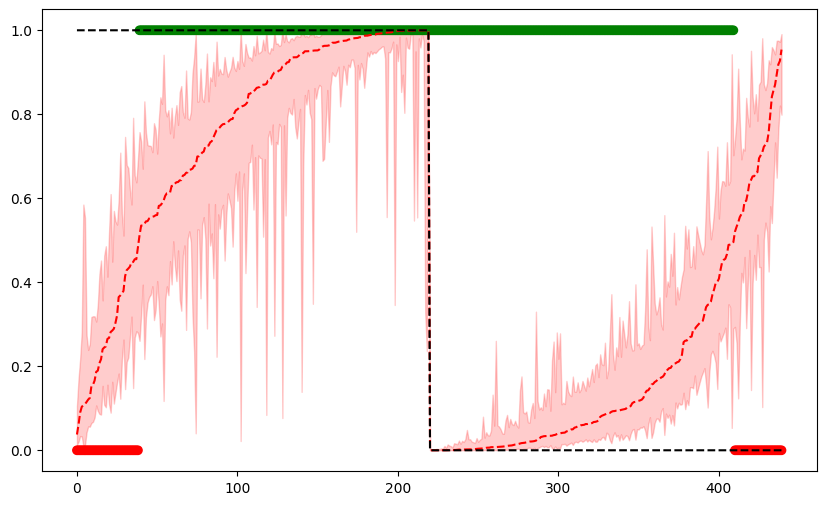

In [203]:
# usando o modelo 1 para fazer previsões com intervalo de confiança

df_test = pd.concat([X_test, y_test], axis=1)
df_test = df_test.reset_index(drop=True)

# Usando o modelo para fazer previsões
predictions = model_1.get_prediction(df_test)
predicted_probs = predictions.predicted_mean

# Obtedo o intervalo de confiança das previsões (intervalo de 95%)
confidence_interval = predictions.conf_int(alpha=0.05)

# Criando um dataframe com as previsões e os intervalos de confiança
confidence_interval = pd.DataFrame(confidence_interval)
predicted_probs = pd.DataFrame(predicted_probs)
predicted_probs = predicted_probs.rename(columns={0: 'y_hat'})
predicted_probs = pd.concat([predicted_probs, confidence_interval], axis=1)
predicted_probs = predicted_probs.rename(columns={0: 'lower', 1: 'upper'})
predicted_probs['y'] = df_test["y"]
predicted_probs['y'] = predicted_probs['y']
predicted_probs['pred_y'] = predicted_probs['y_hat'].apply(lambda x: 1 if x > 0.5 else 0)
predicted_probs["correct"] = predicted_probs.apply(lambda row: 1 if row["y"] == row["pred_y"] else 0, axis=1)

# pegando apenas os valores de y=1
# predicted_probs = predicted_probs[predicted_probs['y'] == 1]

# p1_size = predicted_probs.shape[0]

# Criando a coluna order, que ordena os valores
predicted_probs["order"] = predicted_probs.apply(lambda row: 10 - row["y_hat"] if row["y"] == 1 else -row["y_hat"], axis=1)

# ordenando por y seguido de y_hat
predicted_probs = predicted_probs.sort_values(by=["order"], ascending=False)
predicted_probs = predicted_probs.reset_index(drop=True)
predicted_probs["index"] = predicted_probs.index


# plotando o intervalo de confiança usando fill entre as curvas e usando a cor como se acertou ou não
plt.figure(figsize=(10, 6))
plt.fill_between(predicted_probs['index'], predicted_probs['lower'], predicted_probs['upper'], color='red', alpha=0.2)
plt.plot(predicted_probs['index'], predicted_probs['y_hat'], color='red', linestyle='--')
# fazendo a linha do valor verdadeiro
plt.plot(predicted_probs['index'], predicted_probs['y'], color='black', linestyle='--')
plt.scatter(predicted_probs['index'], predicted_probs['correct'], color=predicted_probs['correct'].apply(lambda x: 'green' if x == 1 else 'red'))

# agora pegando os valores de y=0
# predicted_probs_0 = predicted_probs[predicted_probs['y'] == 0]

# # pegando apenas a mesma quantidade de valores de y=0 que temos de y=1
# predicted_probs_0 = predicted_probs_0.sample(n=p1_size, random_state=42)

# # ordenando por y_hat
# predicted_probs_0 = predicted_probs_0.sort_values(by='y_hat', ascending=True)
# predicted_probs_0 = predicted_probs_0.reset_index(drop=True)
# predicted_probs_0["index"] = predicted_probs_0.index

# # plotando o intervalo de confiança usando fill entre as curvas e usando a cor como se acertou ou não
# plt.fill_between(predicted_probs_0['index'], predicted_probs_0['lower'], predicted_probs_0['upper'], color='green', alpha=0.2)

# plt.plot(predicted_probs_0['index'], predicted_probs_0['y_hat'], color='green', linestyle='--')
# plt.plot(predicted_probs_0['index'], predicted_probs_0['y'], color='green', linestyle='--')
# plt.scatter(predicted_probs['index'], predicted_probs['correct'], color='green', marker='o', alpha=0.1)






# plt.ylabel('Taxa de Conversão')
# plt.title('Intervalo de Confiança')
# plt.show()

predicted_probs
